In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\phuon\Downloads\hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

# Cleaning the dataset

In [4]:
# Check null-value
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df = df.drop(columns = ["agent", "company"])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Replace null values in 'country' column with the most common country
most_common_country = df["country"].mode()[0]
df["country"].fillna(most_common_country, inplace=True)

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [9]:
# Remove data duplicates
df = df.drop_duplicates()

In [10]:
df.describe(include = object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,87347,87347,87347,87347,87347,87347,87347,87347,87347,87347,87347,87347
unique,2,12,5,177,7,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-14
freq,53410,11250,67936,27869,51606,69118,56513,46285,86202,71953,63331,210


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87347 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87347 non-null  object 
 1   is_canceled                     87347 non-null  int64  
 2   lead_time                       87347 non-null  int64  
 3   arrival_date_year               87347 non-null  int64  
 4   arrival_date_month              87347 non-null  object 
 5   arrival_date_week_number        87347 non-null  int64  
 6   arrival_date_day_of_month       87347 non-null  int64  
 7   stays_in_weekend_nights         87347 non-null  int64  
 8   stays_in_week_nights            87347 non-null  int64  
 9   adults                          87347 non-null  int64  
 10  children                        87347 non-null  float64
 11  babies                          87347 non-null  int64  
 12  meal                           

In [12]:
# Change data type of "reservation_status_date" column
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87347 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87347 non-null  object        
 1   is_canceled                     87347 non-null  int64         
 2   lead_time                       87347 non-null  int64         
 3   arrival_date_year               87347 non-null  int64         
 4   arrival_date_month              87347 non-null  object        
 5   arrival_date_week_number        87347 non-null  int64         
 6   arrival_date_day_of_month       87347 non-null  int64         
 7   stays_in_weekend_nights         87347 non-null  int64         
 8   stays_in_week_nights            87347 non-null  int64         
 9   adults                          87347 non-null  int64         
 10  children                        87347 non-null  float64       
 11  b

C:\Users\phuon\AppData\Local\Temp\ipykernel_20628\4055990707.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


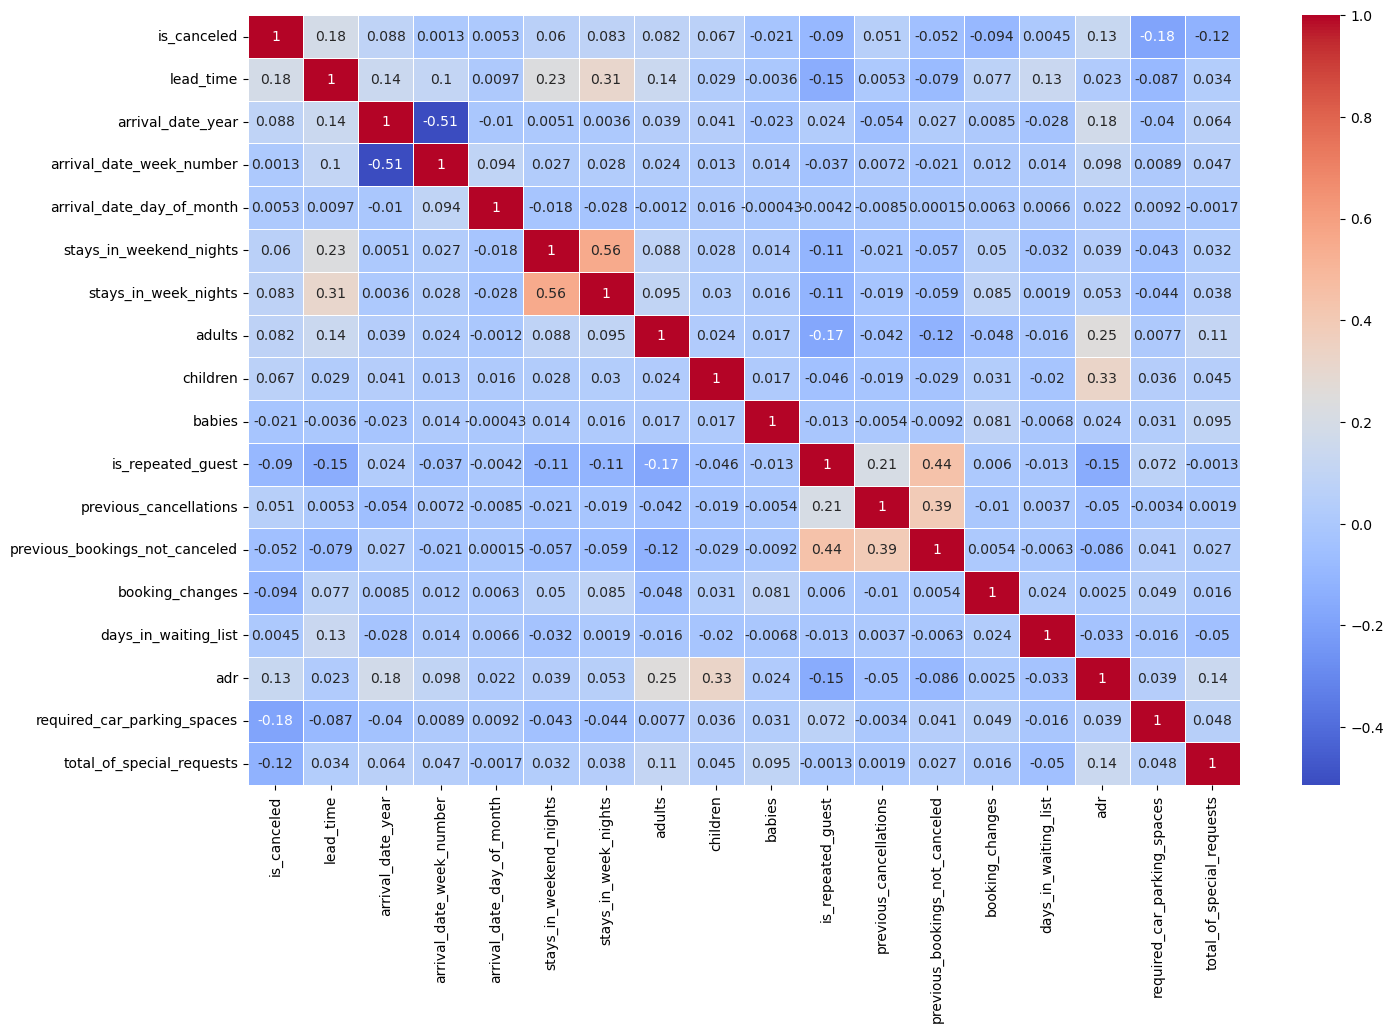

In [13]:
# Headmap Visualization
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Data Analysis and Visualizations

### How many of booking by hotel?

City Hotel      53410
Resort Hotel    33937
Name: hotel, dtype: int64


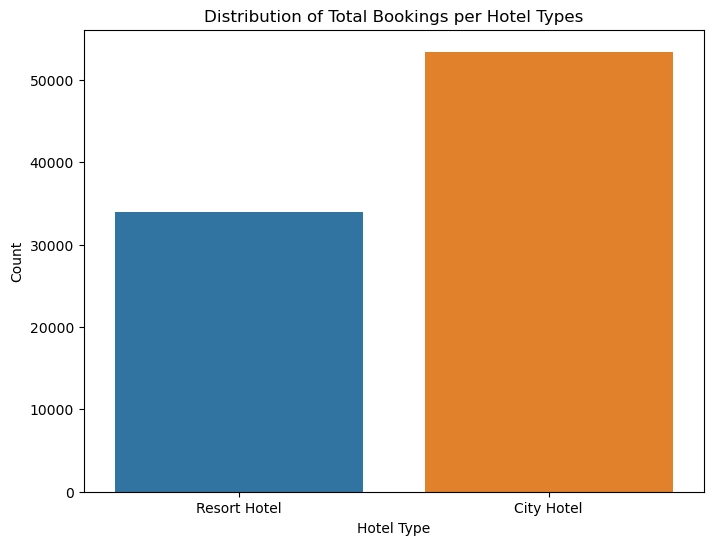

In [14]:
booking_by_hotel = df['hotel'].value_counts()
print(booking_by_hotel)
# Plot distribution of hotel types
plt.figure(figsize=(8,6))
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Total Bookings per Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

There were a total of 53,410 bookings in the City Hotel, indicating a relatively higher number of bookings compared to the Resort Hotel.

### How many bookings in each month?

   arrival_date_month  hotel
0               April   7903
1              August  11250
2            December   5127
3            February   6089
4             January   4689
5                July  10052
6                June   7764
7               March   7508
8                 May   8353
9            November   4992
10            October   6932
11          September   6688


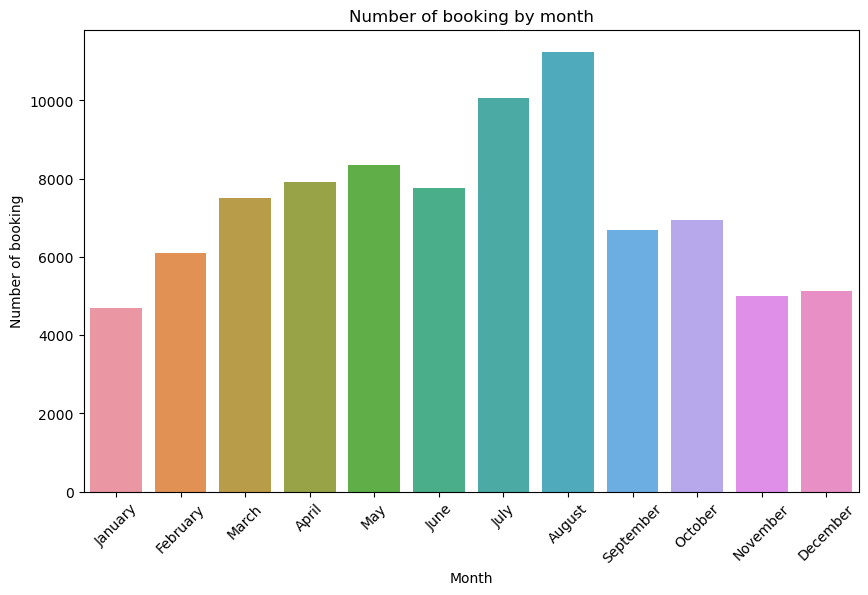

In [15]:
# Number of booking by month
booking_by_month = df.groupby('arrival_date_month')['hotel'].count().reset_index()
print(booking_by_month)
# Month order
month_order = ['January', 'February','March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']
# visualzation
plt.figure(figsize=(10, 6))
sns.barplot(x='arrival_date_month', y='hotel', data=booking_by_month, order = month_order)
plt.title('Number of booking by month')
plt.ylabel('Number of booking')
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.show()

Months such as August, July, and May tend to have higher booking volumes, possibly due to peak travel seasons, while other months like November and January have relatively lower booking volumes.

PRT    27869
GBR    10431
FRA     8837
ESP     7250
DEU     5385
ITA     3065
IRL     3016
BEL     2081
BRA     1993
NLD     1911
Name: country, dtype: int64


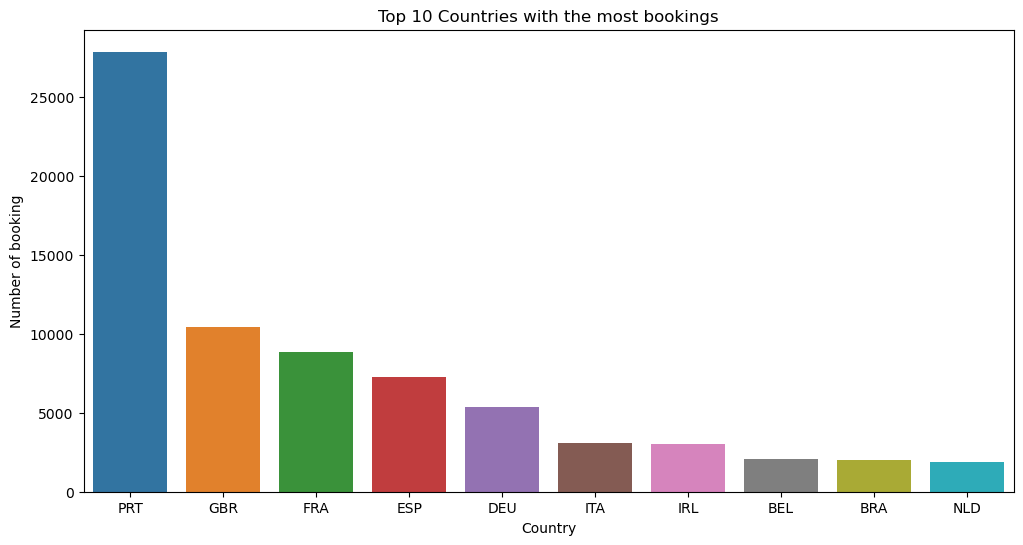

In [16]:
# Top 10 Countries with the Most Bookings
top_10_countries = df['country'].value_counts().head(10)
print(top_10_countries)
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y = top_10_countries.values)
plt.title('Top 10 Countries with the most bookings')
plt.ylabel('Number of booking')
plt.xlabel('Country')
plt.show()

The distribution of booking countries is quite uneven, with Portugal (PRT) leading the way with significantly more bookings than the other countries on the list. Countries like UK (GBR), France (FRA), Spain (ESP), Germany (DEU) also have a large number of bookings.

### How often do guests stay in night?

3.6314240901233013


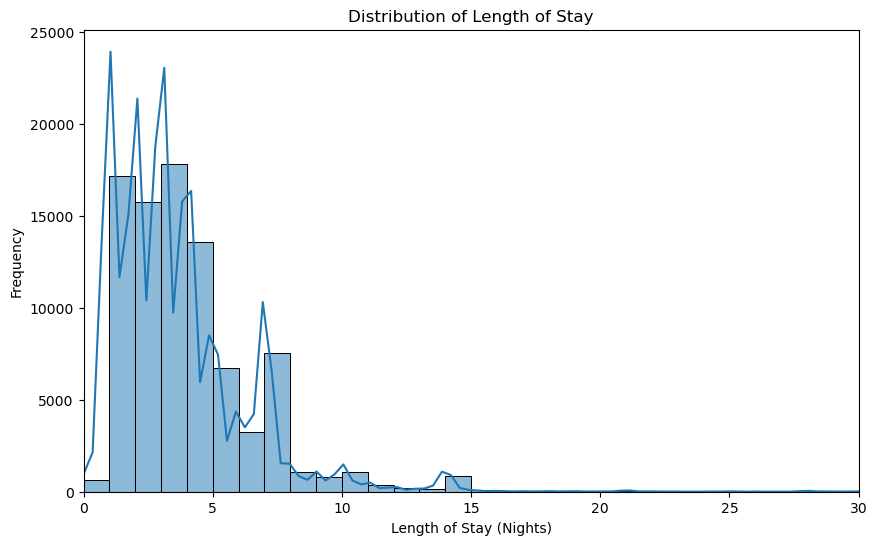

In [17]:
# Total length of stay
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
average_stays = df['total_stays'].mean()
print(average_stays)
# Plot a histogram of the length of stay
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_stays', bins=range(0, df['total_stays'].max()+1), kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (Nights)')
plt.ylabel('Frequency')
plt.xlim(0, 30)
plt.show()

The average length of stay is approximately 3.63 nights, and the histogram shows the frequency of different stay lengths, ranging from 0 to 30 nights. The majority of guests tend to stay for shorter durations, with the highest frequency occurring around 1 to 4 nights.

### What types of customers are most common in each hotel?

hotel            City Hotel  Resort Hotel
customer_type                            
Contract               1471          1668
Group                   271           273
Transient             44632         27321
Transient-Party        7036          4675


<Figure size 1000x600 with 0 Axes>

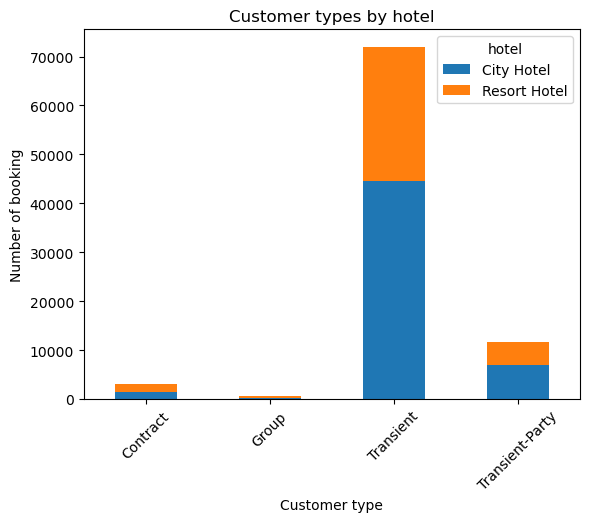

In [18]:
customer_types = df.groupby(['customer_type'])['hotel'].value_counts().unstack()
print(customer_types)

plt.figure(figsize=(10, 6))
customer_types.plot(kind='bar', stacked=True)
plt.title('Customer types by hotel')
plt.ylabel('Number of booking')
plt.xlabel('Customer type')
plt.xticks(rotation=45)
plt.show()

The majority of bookings in both hotel types are from the "Transient" customer type. This indicates that a significant number of guests are individual transient travelers.

### What is their preferred meal plan?

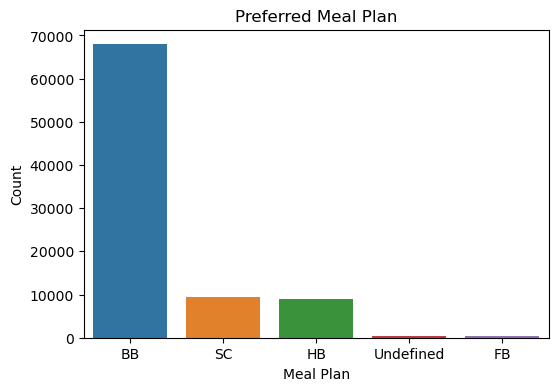

In [19]:
# Create a countplot with pie chart style
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='meal', order=df['meal'].value_counts().index)
plt.title('Preferred Meal Plan')
plt.xlabel('Meal Plan')
plt.ylabel('Count')
plt.show()

It looks like HB is preffered and booked by many. (HB :- Half Board which means breakfast and dinner is included)

### What is the strongest market segment and distribution channel?

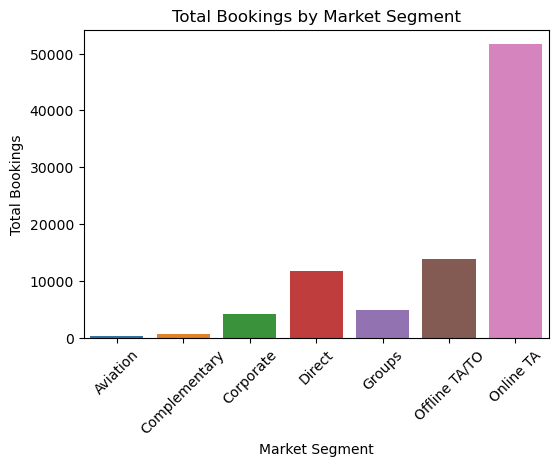

In [20]:
# Calculate total bookings
market_segment_counts = df.groupby('market_segment')['hotel'].count().reset_index()

# Plot for Market Segment
plt.figure(figsize=(6, 4))
sns.barplot(x='market_segment', y='hotel', data=market_segment_counts)
plt.title('Total Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45)
plt.show()

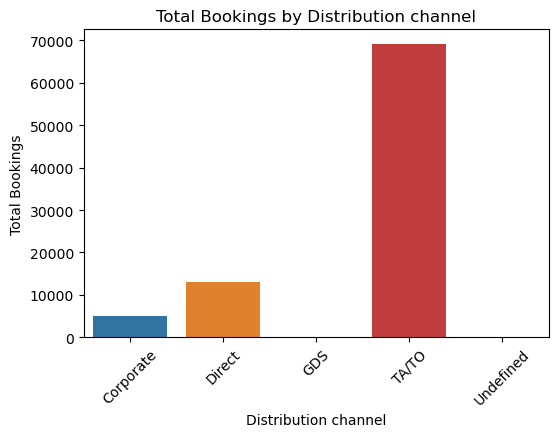

In [21]:
# Calculate total bookings
distribution_channel_counts = df.groupby('distribution_channel')['hotel'].count().reset_index()

# Plot for distribution channel
plt.figure(figsize=(6, 4))
sns.barplot(x='distribution_channel', y='hotel', data = distribution_channel_counts)
plt.title('Total Bookings by Distribution channel')
plt.xlabel('Distribution channel')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45)
plt.show()

### ADR by Hotel type in each month

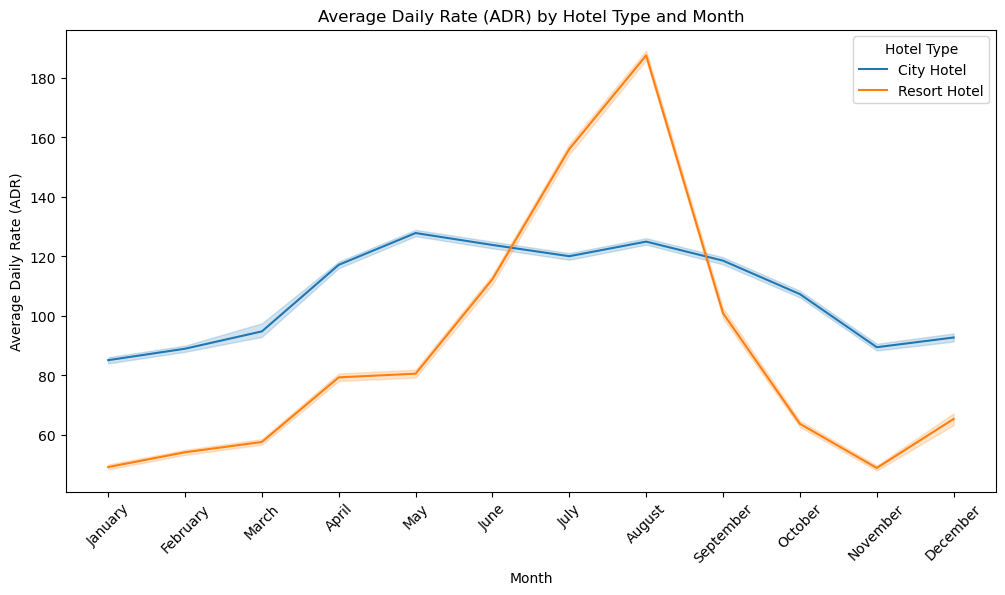

In [22]:
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['month_order'] = df['arrival_date_month'].map(month_order)
df_sorted = df.sort_values(by='month_order')
# Plot for ADR
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=df_sorted )
plt.title('Average Daily Rate (ADR) by Hotel Type and Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.show()

The ADR tends to be higher in the summer months (July, August) and lower in the winter months (November, December, January). This could be due to increased travel and vacation activities during the summer, leading to higher demand and potentially higher prices.
The ADR for the Resort Hotel is generally higher than that of the City Hotel, indicating that resort-type accommodations tend to have higher average rates, possibly due to their premium offerings and amenities.

## Cancellation Analysis

### How many cancellation percentage for each hotel?

          hotel  is_canceled
0    City Hotel    30.037446
1  Resort Hotel    23.493532


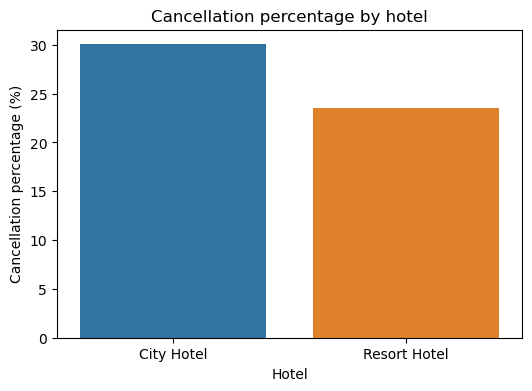

In [23]:
# Cancellation percentage by hotel
canceled_perc = df.groupby('hotel')['is_canceled'].mean()*100
# Convert the Series to a Dataframe
canceled_perc = canceled_perc.reset_index()
print(canceled_perc)
# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x='hotel', y='is_canceled', data=canceled_perc)
plt.title('Cancellation percentage by hotel')
plt.ylabel('Cancellation percentage (%)')
plt.xlabel('Hotel')
plt.xticks(rotation = 0)
plt.show()

From the visualization, we can see that the City Hotel (30.04%) has a higher cancellation percentage compared to the Resort Hotel (23.49%).

### Top 10 countries with the most cancellations

PRT    9816
GBR    1985
ESP    1862
FRA    1733
ITA    1075
DEU    1053
BRA     727
IRL     668
USA     459
BEL     411
Name: country, dtype: int64


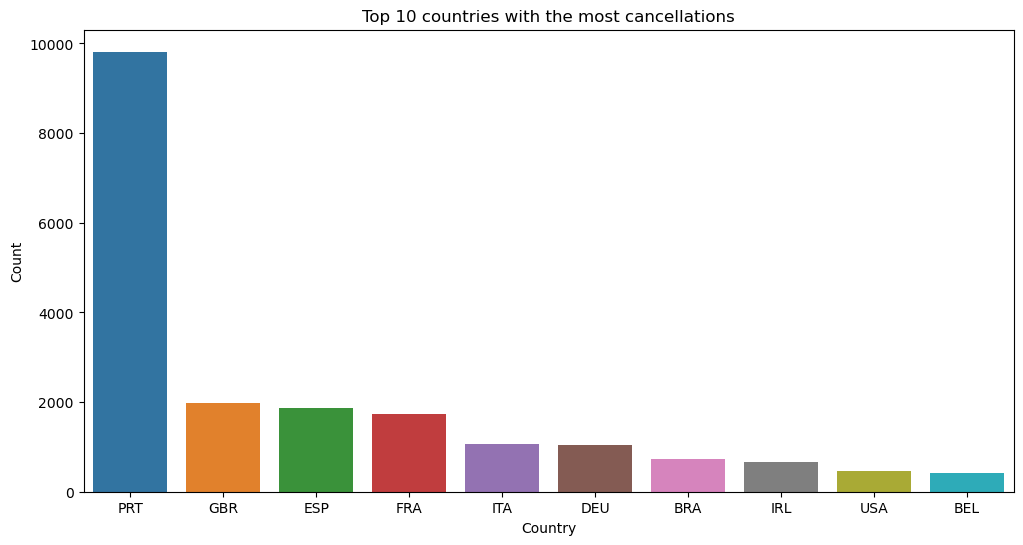

In [24]:
canceled_country = df[df['is_canceled']==1]['country'].value_counts().head(10)
print(canceled_country)
# Bar plot visualization
plt.figure(figsize=(12, 6))
sns.barplot(x = canceled_country.index, y = canceled_country.values)
plt.title('Top 10 countries with the most cancellations')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Portugal (PRT), United Kingdom (GBR), and Spain(ESP) have the highest number of cancellations among the top 10 countries. These 3 countries are also the 3 countries with the highest number of bookings in the top4

### Booking and cancel by month

is_canceled            0     1
arrival_date_month            
January             3651  1038
February            4674  1415
March               5678  1830
April               5495  2408
May                 5911  2442
June                5411  2353
July                6854  3198
August              7633  3617
September           5046  1642
October             5290  1642
November            3939  1053
December            3749  1378


<Figure size 1200x600 with 0 Axes>

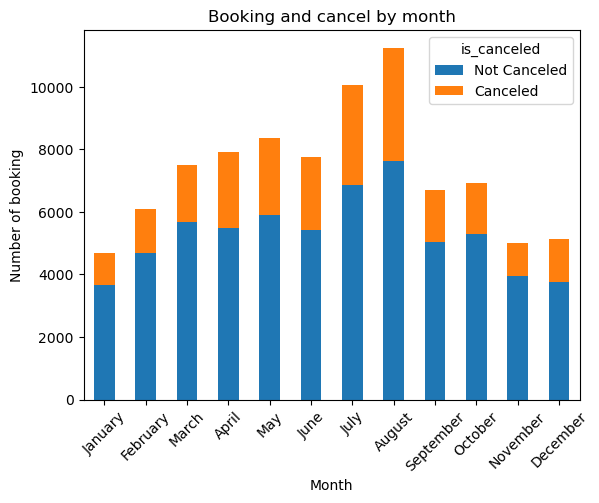

In [25]:
booking_and_cancel_by_month = df.groupby(['arrival_date_month'])['is_canceled'].value_counts().unstack()
# Month order
booking_and_cancel_by_month = booking_and_cancel_by_month.reindex(['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'
], axis=0)
print(booking_and_cancel_by_month)
# Visualization
plt.figure(figsize=(12, 6))
booking_and_cancel_by_month.plot(kind='bar', stacked=True)
plt.title('Booking and cancel by month')
plt.ylabel('Number of booking')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

August and July have the highest number of bookings and cancellations, while December and November have relatively lower numbers of cancellations. It's also interesting to note that months with higher booking counts tend to have higher cancellation rates, which could indicate potential seasonal trends or other factors influencing customer behavior.

### Cancellation by Lead Time

lead_time
0        5.915871
1        6.604361
2        9.412376
3        9.982384
4        9.821429
          ...    
622    100.000000
626    100.000000
629    100.000000
709      0.000000
737      0.000000
Name: is_canceled, Length: 479, dtype: float64


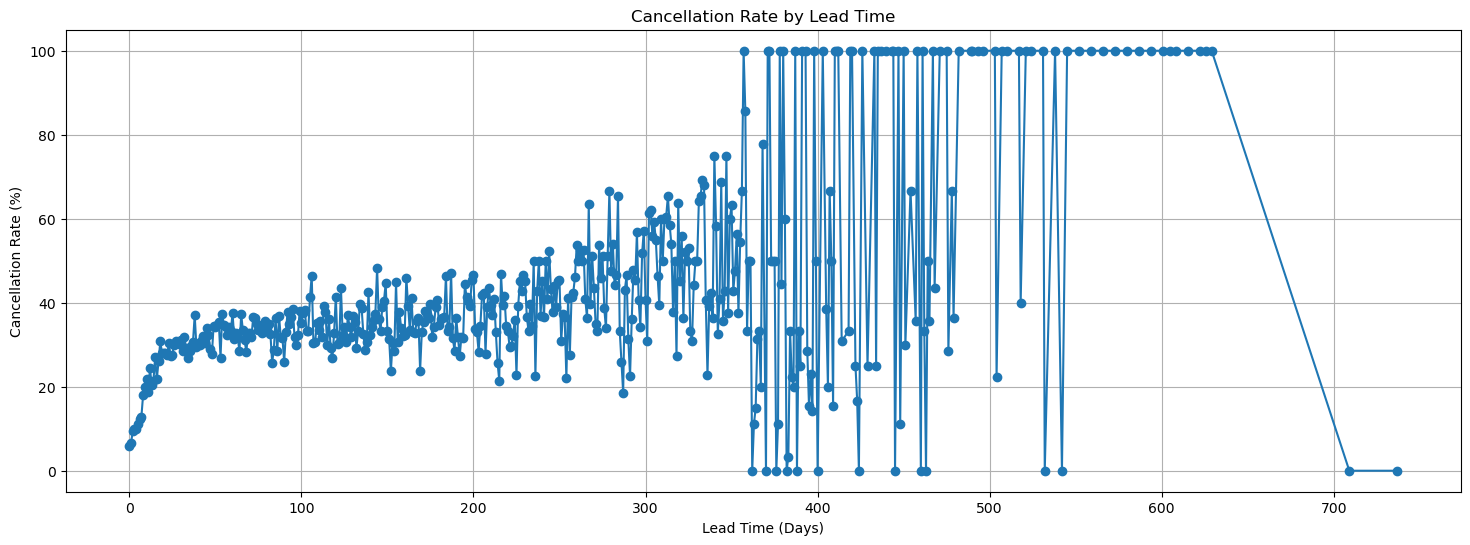

In [26]:
lead_time_cancel = df.groupby('lead_time')['is_canceled'].mean() * 100
print(lead_time_cancel)
plt.figure(figsize=(18, 6))
plt.plot(lead_time_cancel.index, lead_time_cancel.values, marker='o')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.show()


Previous graph suggests that there is a positive relationship between lead time and cancellation. The longer the time between booking and actual stay, the more likely the booking is to be cancelled.

### Cancellation by Market Segment and Distribution Channel

   market_segment distribution_channel  is_canceled
0        Aviation            Corporate    20.276498
1        Aviation                TA/TO    10.000000
2   Complementary            Corporate    17.283951
3   Complementary               Direct    12.271062
4   Complementary                TA/TO     9.333333
5       Corporate            Corporate    12.284760
6       Corporate               Direct     9.740260
7       Corporate                TA/TO    10.967742
8          Direct            Corporate     9.756098
9          Direct               Direct    14.971259
10         Direct                  GDS     0.000000
11         Direct                TA/TO     3.930131
12         Direct            Undefined     0.000000
13         Groups            Corporate    13.751868
14         Groups               Direct    17.257319
15         Groups                TA/TO    31.234466
16  Offline TA/TO            Corporate     6.315789
17  Offline TA/TO               Direct    18.750000
18  Offline 

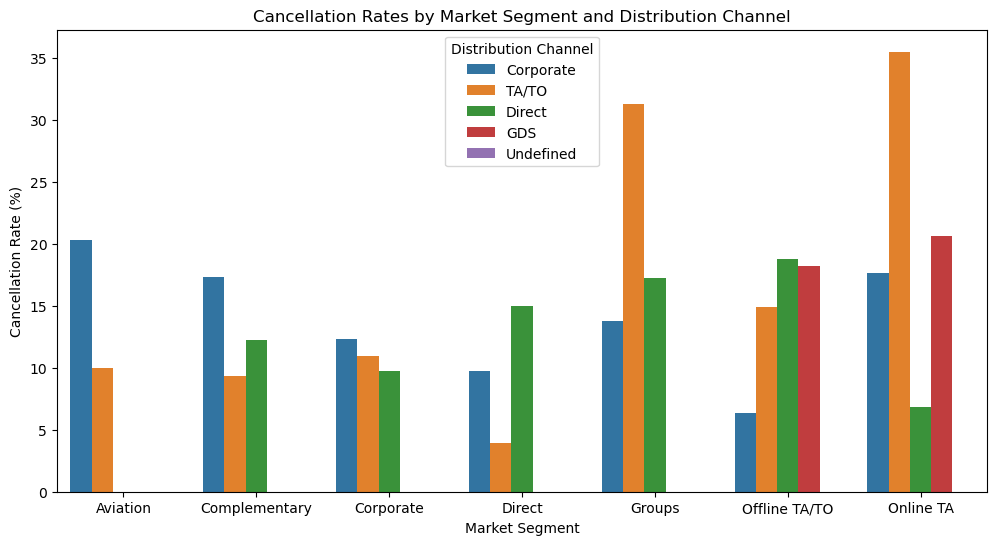

In [27]:
# Calculate cancellation rates
cancellation_by_segment_channel = df.groupby(['market_segment', 'distribution_channel'])['is_canceled'].mean() * 100
# Convert to a dataframe
cancellation_by_segment_channel = cancellation_by_segment_channel.reset_index()
print(cancellation_by_segment_channel)
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='is_canceled', hue='distribution_channel', data=cancellation_by_segment_channel)
plt.title('Cancellation Rates by Market Segment and Distribution Channel')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate (%)')
plt.legend(title='Distribution Channel')
plt.show()


The "Online TA" market segment has the highest cancellation rate, particularly when bookings are made through the "TA/TO" distribution channel. Additionally, the "TA/TO" and Corporate distribution channels also exhibit high cancellation rates.

# Recommendations

- <b> Seasonal Pricing </b>: Adjust pricing strategies based on seasonal variations. Implement dynamic pricing to capitalize on high-demand periods and attract bookings during lower-demand periods.
- <b> Guest Experience </b>: Enhance the overall guest experience to encourage longer stays. Offer packages that include additional nights at discounted rates or provide unique experiences for extended stays.
- <b> Country-Specific Strategies </b>: Focus on the top cancellation countries (PRT, GBR, FRA, ESP, DEU) by understanding their preferences, expectations, and reasons for cancellations.
- <b> Lead Time Promotion </b>: Promote and incentivize early bookings by offering special deals, discounts, or perks for guests who book well in advance. This can help reduce cancellation rates.